# Closed system simulation with experimental data markers

In this simulation we have a system of 5 liters in which we start with Next = 1000/500/200, some Nint (measured) of some mass (m). After this we "feed" for a period of 7/3.5/2.33 days, i.e. solve the "feeding" part of the simulation. After that, we add 1000/500/200 uM to the last value of Next and keep "feeding". After one duration (7 days) we reset the water, mass and the amplitude to the beginning of the first cycle. The only difference from the t_0 is the Nint which is accumulating all the effects through the time. The mass is reset to m_0 and Next is reset to 1000 ppm (per something per something)


In [1]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import seaborn as sns
from array import *
import researchpy as rp
import scipy.stats as stats
%matplotlib inline

from myfunctions_offshore import *

import datetime

In [2]:
# statistics functions

import scikit_posthocs as scp

In [3]:
# Import data and parameters

xl = pd.ExcelFile('C:/Users/meiro/Desktop/GitHub/Model/Meiron_model/data/Parameters.xlsx')
x2 = pd.ExcelFile('C:/Users/meiro/Desktop/GitHub/Model/Meiron_model/data/Data.xlsx')

# Import parameters into df1
df1 = xl.parse('Parameters',header=None)

# Import indoor data into df2
df2 = x2.parse('Indoor')

# Import offshore data ito df2
df3 = x2.parse('Offshore')

# Import outdoor data ito df4
df4 = x2.parse('Outdoor')

In [4]:
df3.head()

,Sample,Exp,Period,Cage,Depth,Stage,Days,Timei,Timeh,Timem,...,NO3,dN,TN,DGR,RGR,GR,Treatment,Comment,Comment 2,N_Saturation
0,1.0,1,Continuous,1,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
1,2.0,1,Continuous,2,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
2,3.0,1,Continuous,3,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
3,4.0,1,Continuous,4,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
4,5.0,1,Continuous,5,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no


In [5]:
# SA #2
# Statistical analysis for offshore experiments results
# ANOVA / Multiple T-test 2-side unequal...
# Effect of Date, depth, period and duration on DGR/Nint

In [6]:
# Reduced datastes
d = df3[(df3.Stage == 'f')&(np.isnan(df3.DGR)!= True)&(df3.Comment != 'Losses')]
dN = df3[(df3.Stage == 'f')&(np.isnan(df3.N)!= True)]

76


Text(0, 0.5, 'Frequency of observations')

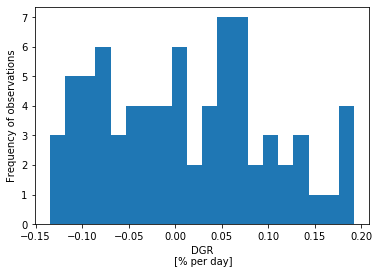

In [7]:
dNormfull = df3[(df3.Stage == 'f')&(np.isnan(df3.DGR)!= True)&(df3.Comment != 'Losses')&(df3.Treatment != 'Acclimation')]
print(len(dNormfull.DGR))
plt.hist(dNormfull['DGR'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'DGR\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

31


Text(0, 0.5, 'Frequency of observations')

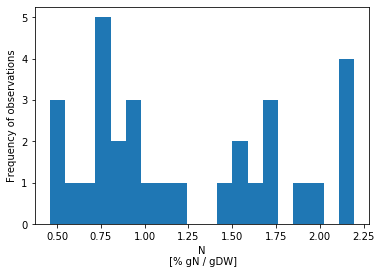

In [8]:
dNormfullN = df3[(df3.Stage == 'f')&(np.isnan(df3.N)!= True)&(df3.Treatment != 'Acclimation')]
print(len(dNormfullN.N))
plt.hist(dNormfullN['N'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'N\n [% gN / gDW]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

In [9]:
rp.summary_cont(d['DGR'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,DGR,76.0,0.0118,0.0876,0.0101,-0.0082,0.0318


In [10]:
rp.summary_cont(dN['N'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,N,31.0,1.2288,0.5698,0.1023,1.0198,1.4378


In [11]:
rp.summary_cont(d[(d.Period == 'Rapid')&(d.Depth == 5)]['DGR'].groupby(d['Exp']))#,rp.summary_cont(d['N'].groupby(d['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
1,6,-0.0710,0.0474,0.0194,-0.1208,-0.0212
2,6,-0.0792,0.0230,0.0094,-0.1034,-0.0550


In [12]:
rp.summary_cont(d[(d.Period == 'Continuous')&(d.Depth == 5)]['DGR'].groupby(d['Exp']))#,rp.summary_cont(d['N'].groupby(d['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
2,6,0.1345,0.0432,0.0176,0.0892,0.1798
3,9,0.0734,0.0123,0.0041,0.0640,0.0828
4,12,0.0099,0.0309,0.0089,-0.0098,0.0295
5,12,0.1173,0.0505,0.0146,0.0852,0.1493


In [106]:
rp.summary_cont(d[(d.Period == 'Continuous')&(d.Depth == 5)]['GR'].groupby(d['Exp']))#,rp.summary_cont(d['N'].groupby(d['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
2,6,9.8054,2.4489,0.9998,7.2354,12.3754
3,9,6.0848,0.8476,0.2825,5.4333,6.7363
4,12,0.6438,3.0977,0.8942,-1.3244,2.6120
5,12,7.3417,2.3525,0.6791,5.8471,8.8364


In [13]:
palette = sns.color_palette("hls",4)


In [14]:
# Mann-Whitney U Test between short and long fertilizing - DGR and N
print(stats.mannwhitneyu(d[(d['Period'] == 'Continuous')]['DGR'],d[(d['Period'] == 'Rapid')]['DGR']))
print(stats.mannwhitneyu(dN[(dN['Period'] == 'Continuous')]['N'],dN[(dN['Period'] == 'Rapid')]['N']))

MannwhitneyuResult(statistic=37.0, pvalue=9.208862337894612e-11)
MannwhitneyuResult(statistic=14.5, pvalue=0.0005565265839253251)


In [15]:
# Mann-Whitney U Test between rapid fertilizing in sea water and rapid fertilizing in enriched seawater
seawater = [-8.3,-11.3,-2.8,-10.0,-12.5,-12.9,-9.4,-12.1,-7.6,-7.0,-4.6]
enriched_seawater = [-11.9,-12.3,0.1,-10.2,-12.5,-4.1,-13.5,-7.9,-11.7,-8.3,-8.3]

print(stats.mannwhitneyu(seawater,enriched_seawater))

MannwhitneyuResult(statistic=54.5, pvalue=0.3587998984432301)


In [16]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5
for i in [1,5]:
    print('\nDepth: ' + str(i))
    print(stats.mannwhitneyu(d[(d['Depth'] == i)&(d['Period'] == 'Continuous')]['DGR'],d[(d['Depth'] == i)&(d['Period'] == 'Rapid')]['DGR']))
    print(stats.mannwhitneyu(dN[(dN['Depth'] == i)&(dN['Period'] == 'Continuous')]['N'],dN[(dN['Depth'] == i)&(dN['Period'] == 'Rapid')]['N']))


Depth: 1
MannwhitneyuResult(statistic=7.0, pvalue=9.047524521878144e-05)
MannwhitneyuResult(statistic=2.0, pvalue=0.06801856405707181)

Depth: 5
MannwhitneyuResult(statistic=6.0, pvalue=2.1842330497421485e-07)
MannwhitneyuResult(statistic=4.5, pvalue=0.003710742097558665)


In [17]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5 - preliminary run and run 1
for i in [1,5]:
    print('\nDepth: ' + str(i))
    print(stats.mannwhitneyu(d[(d.Exp != 3)&(d.Exp != 4)&(d.Exp != 5)&(d['Depth'] == i)&(d['Period'] == 'Continuous')]['DGR'],d[(d.Exp != 3)&(d.Exp != 4)&(d.Exp != 5)&(d['Depth'] == i)&(d['Period'] == 'Rapid')]['DGR']))
    print(stats.mannwhitneyu(dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)&(dN['Depth'] == i)&(dN['Period'] == 'Continuous')]['N'],dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)&(dN['Depth'] == i)&(dN['Period'] == 'Rapid')]['N']))


Depth: 1
MannwhitneyuResult(statistic=0.0, pvalue=0.0006877956336232928)
MannwhitneyuResult(statistic=2.0, pvalue=0.19136654444261297)

Depth: 5
MannwhitneyuResult(statistic=0.0, pvalue=0.00043956773537653243)
MannwhitneyuResult(statistic=4.5, pvalue=0.19181516356599487)


In [18]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5 - only exp 2
print(stats.mannwhitneyu(d[(d['Exp'] != 3)&(d['Exp'] != 4)&(d['Exp'] != 5)&(d['Period'] == 'Continuous')]['DGR'],d[(d['Exp'] != 3)&(d['Exp'] != 4)&(d['Exp'] != 5)&(d['Period'] == 'Rapid')]['DGR']))
print(stats.mannwhitneyu(dN[(dN['Exp'] != 3)&(dN['Exp'] != 4)&(dN['Exp'] != 5)&(dN['Period'] == 'Continuous')]['N'],dN[(dN['Exp'] != 3)&(dN['Exp'] != 4)&(dN['Exp'] != 5)&(dN['Period'] == 'Rapid')]['N']))

MannwhitneyuResult(statistic=3.0, pvalue=1.8180050555514708e-06)
MannwhitneyuResult(statistic=14.5, pvalue=0.11214460624118305)


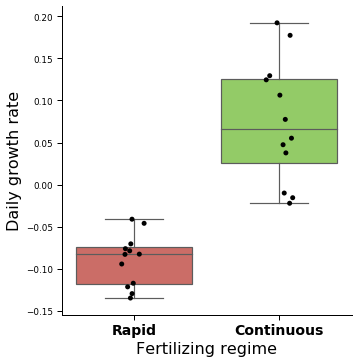

In [19]:
# growth rates in different fertilizing regimes - preliminary run and run 1
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DEP_DGR = sns.catplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],kind='box',palette=palette,order = ['Rapid','Continuous'])
#SA2_PER_DGR.set(xlabel = ['a','b'])#, ylabel=y_axis)
SA2_DEP_DGR.set_xticklabels(['Continuous N \nEnrichment', '1-day N\n Enrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k').set(xlabel='Fertilizing regime', ylabel='Daily growth rate')
SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Daily growth rate')

In [20]:
df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')&(df3.Period == 'Rapid')]['DGR']

80   -0.041071
81   -0.134720
82   -0.078644
83   -0.129464
84   -0.094286
85   -0.121429
86   -0.117143
87   -0.082556
88   -0.082857
89   -0.076095
90   -0.070362
91   -0.045969
Name: DGR, dtype: float64

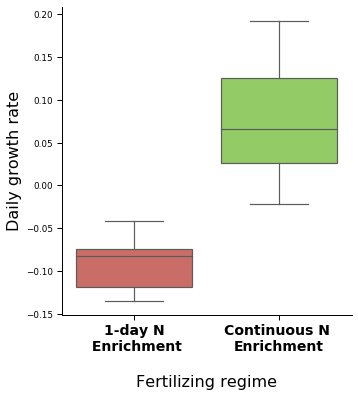

In [21]:
# growth rates in different fertilizing regimes - preliminary run and run 1 - without scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DEP_DGR = sns.catplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],kind='box',palette=palette,order = ['Rapid','Continuous']).set(xlabel='\nFertilizing regime', ylabel='Daily growth rate')
#SA2_PER_DGR.set(xlabel = ['a','b'])#, ylabel=y_axis)
SA2_DEP_DGR.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k').set(xlabel='Fertilizing regime', ylabel='Daily growth rate')
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Daily growth rate')

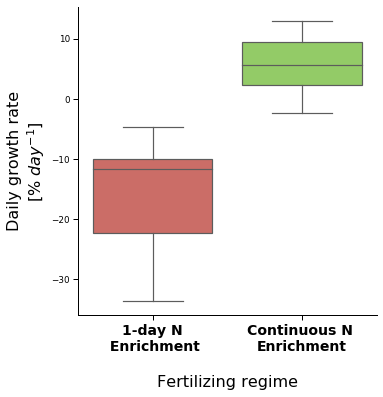

In [24]:
# growth rates in different fertilizing regimes - preliminary run and run 1 - without scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DEP_DGR = sns.catplot(x = 'Period', y = 'GR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],kind='box',palette=palette,order = ['Rapid','Continuous']).set(xlabel='\nFertilizing regime', ylabel='Daily growth rate\n[% $day^{-1}$]')
#SA2_PER_DGR.set(xlabel = ['a','b'])#, ylabel=y_axis)
SA2_DEP_DGR.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k').set(xlabel='Fertilizing regime', ylabel='Daily growth rate')
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Daily growth rate')

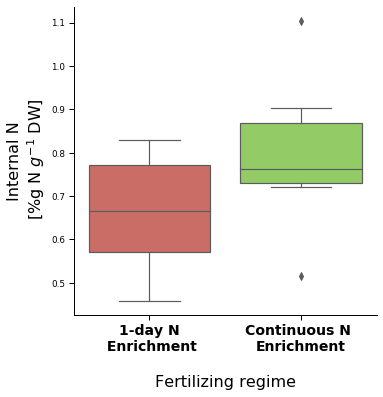

In [25]:
# N in different fertilizing regimes - preliminary run and run 1
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DEP_N = sns.catplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)],kind='box',palette=palette,order = ['Rapid','Continuous']).set(xlabel='\nFertilizing regime', ylabel='Internal N\n [%g N $g^{-1}$ DW]')
SA2_DEP_N.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_N = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 2)],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Internal N \n[% gN / gDW]')
#SA2_DEP_N = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Internal N \n[% gN / gDW]')

In [26]:
df3[(df3.Exp != 3)&(df3.Exp != 4)&(df3.Exp != 5)&(df3.Comment != 'Losses')&(df3.Stage == 'f')&(df3.Period == 'Rapid')&(df3.Depth == 1)]['N']

34         NaN
35         NaN
36    0.830087
37         NaN
80    0.664737
81         NaN
82    0.782142
83         NaN
84         NaN
85         NaN
Name: N, dtype: float64

In [27]:
dc = d[(d['Exp'] != 1)&(d['Exp'] != 4)&(d['Exp'] != 5)]
dNc = dN[(dN['Exp'] != 1)&(dN['Exp'] != 4)&(dN['Exp'] != 5)]

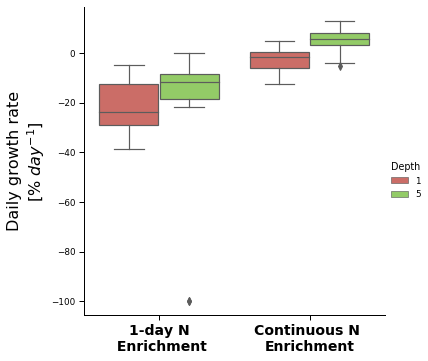

In [33]:
# growth rates in different periods - by depth
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_DGR_D = sns.catplot(x = 'Period', y = 'GR', data = d,kind='box',palette=palette,hue = 'Depth').set(xlabel='', ylabel='Daily growth rate\n[% $day^{-1}$]')
SA2_DEP_DGR_D.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR_W = sns.stripplot(x = 'Period', y = 'DGR', data = d,color='k').set(xlabel='Period', ylabel='Daily growth rate')

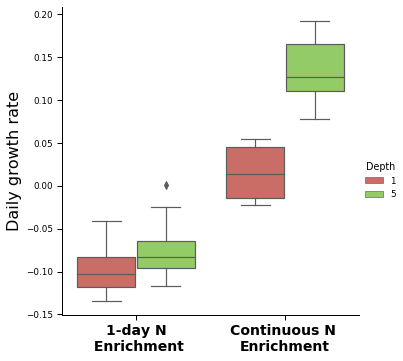

In [34]:
# growth rates in different periods - by depth - only run 1
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_DGR_D = sns.catplot(x = 'Period', y = 'DGR', data = d[(d.Exp != 3)&(d.Exp != 4)&(d.Exp != 5)],kind='box',palette=palette,hue = 'Depth',order = ['Rapid','Continuous']).set(xlabel='', ylabel='Daily growth rate')
SA2_DEP_DGR_D.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR_W = sns.stripplot(x = 'Period', y = 'DGR', data = d,color='k').set(xlabel='Period', ylabel='Daily growth rate')

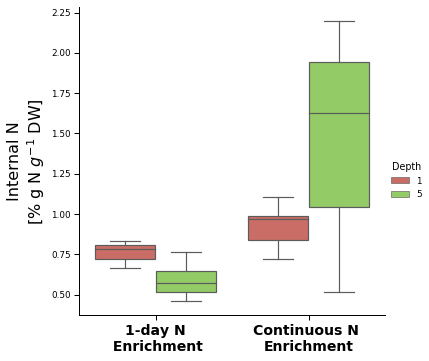

In [35]:
# N in different periods - by depth
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_N_D = sns.catplot(x = 'Period', y = 'N', data = dN,kind='box',palette=palette,hue='Depth',order = ['Rapid','Continuous']).set(xlabel='', ylabel='Internal N\n[% g N $g^{-1}$ DW]')
SA2_DEP_N_D.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_N_D = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Depth == i)&(dN.Exp == j)],color='k').set(xlabel='Period', ylabel='Internal N\n[% gN / gDW]')

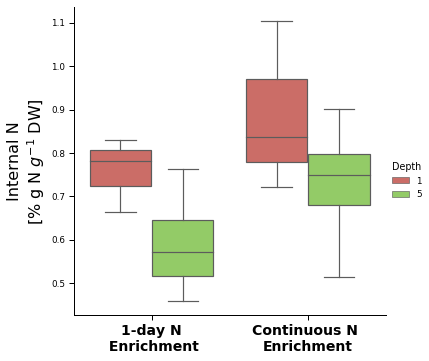

In [36]:
# N in different periods - by depth - run 1 + preliminary
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_N_D = sns.catplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)],kind='box',palette=palette,hue='Depth',order = ['Rapid','Continuous']).set(xlabel='', ylabel='Internal N\n[% g N $g^{-1}$ DW]')
SA2_DEP_N_D.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_N_D = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Depth == i)&(dN.Exp == j)],color='k').set(xlabel='Period', ylabel='Internal N\n[% gN / gDW]')

In [37]:
dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)].N

15    0.836141
18    0.514701
21    0.735929
36    0.830087
38    0.458092
41    0.534330
56    0.721715
58    1.104076
64    0.902285
67    0.762314
80    0.664737
82    0.782142
88    0.607461
91    0.762314
Name: N, dtype: float64

In [38]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5
dc = d[(d['Period'] == 'Continuous')&(d['Exp'] != 1)&(d['Exp'] != 4)&(d['Exp'] != 5)]
dNc = dN[(dN['Period'] == 'Continuous')&(dN['Exp'] != 1)&(dN['Exp'] != 4)&(dN['Exp'] != 5)]

print(stats.mannwhitneyu(dc[(dc['Depth'] == 1)]['DGR'],dc[(dc['Depth'] == 5)]['DGR']))
print(stats.mannwhitneyu(dNc[(dN['Depth'] == 1)]['N'],dNc[(dNc['Depth'] == 5)]['N']))

MannwhitneyuResult(statistic=0.0, pvalue=1.6874374779290916e-06)
MannwhitneyuResult(statistic=7.0, pvalue=0.44261695723660077)


C:\Users\meiro\Anaconda3new\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


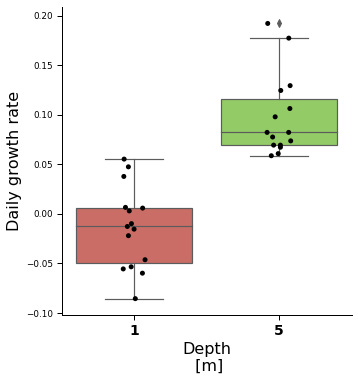

In [39]:
# growth rates in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Depth', y = 'DGR', data = dc,kind='box',palette=palette)
SA1_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Depth', y = 'DGR', data = dc,color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

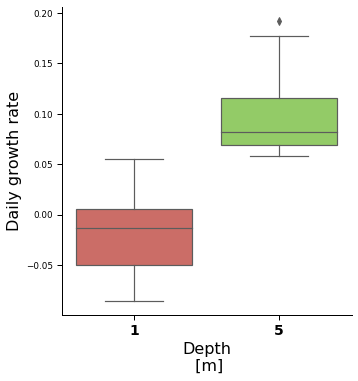

In [40]:
# growth rates in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Depth', y = 'DGR', data = dc,kind='box',palette=palette)
SA1_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'}).set(xlabel='Depth\n [m]', ylabel='Daily growth rate')
#SA1_DUR_DGR = sns.stripplot(x = 'Depth', y = 'DGR', data = dc,color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

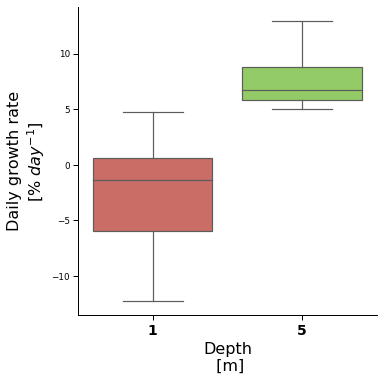

In [42]:
# growth rates in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Depth', y = 'GR', data = dc,kind='box',palette=palette)
SA1_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'}).set(xlabel='Depth\n [m]', ylabel='Daily growth rate\n[% $day^{-1}$]')
#SA1_DUR_DGR = sns.stripplot(x = 'Depth', y = 'DGR', data = dc,color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

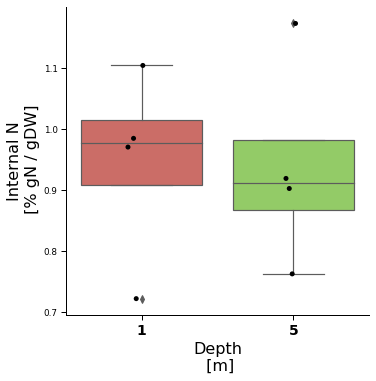

In [43]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Depth', y = 'N', data = dNc,kind='box',palette=palette)#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot(x = 'Depth', y = 'N', data = dNc,color='k').set(xlabel='Depth\n [m]', ylabel='Internal N\n [% gN / gDW]')

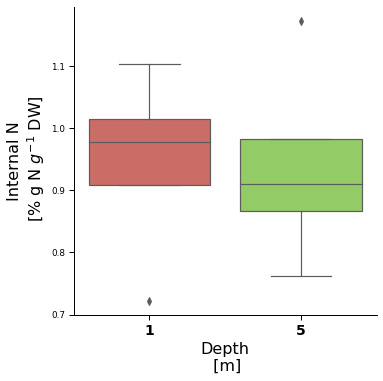

In [44]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Depth', y = 'N', data = dNc,kind='box',palette=palette)#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'}).set(xlabel='Depth\n [m]', ylabel='Internal N\n [% g N $g^{-1}$ DW]')
#SA2_DUR_DGR = sns.stripplot(x = 'Depth', y = 'N', data = dNc,color='k').set(xlabel='Depth\n [m]', ylabel='Internal N\n [% gN / gDW]')

In [45]:
# data summary of depth = 5, period =1, by exp (DGR)
d5 = d[(d['Depth'] == 5)&(d['Period'] == 'Continuous')&(d['Exp'] != 1)]
d5N = dN[(dN['Depth'] == 5)&(dN['Period'] == 'Continuous')&(np.isnan(dN.N) != True)]
rp.summary_cont(d5['DGR'].groupby(d5['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
2,6,0.1345,0.0432,0.0176,0.0892,0.1798
3,9,0.0734,0.0123,0.0041,0.0640,0.0828
4,12,0.0099,0.0309,0.0089,-0.0098,0.0295
5,12,0.1173,0.0505,0.0146,0.0852,0.1493


In [46]:
# data summary of depth = 5, period =1, by exp (DGR)
d1 = d[(d['Depth'] == 1)&(d['Period'] == 'Continuous')&(d['Exp'] != 1)]
d1N = dN[(dN['Depth'] == 1)&(dN['Period'] == 'Continuous')&(np.isnan(dN.N) != True)]
rp.summary_cont(d1['DGR'].groupby(d1['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
2,6,0.0154,0.0350,0.0143,-0.0213,0.0521
3,9,-0.0333,0.0342,0.0114,-0.0596,-0.0069


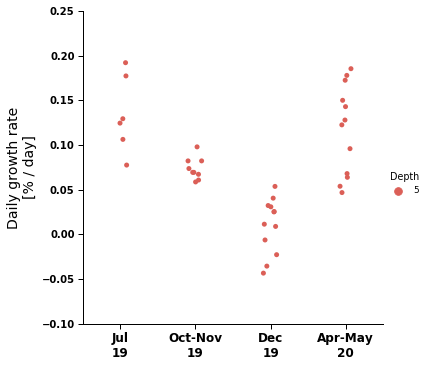

In [47]:
#Offshore results for D = 5, first period, without the preliminary experiment
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2D5 = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)],hue='Depth',palette=palette).set(xlabel='', ylabel='Daily growth rate\n[% / day]')
#SA2D5 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)],hue='Depth',palette=palette).set(xlabel='', ylabel='Daily growth rate')
SA2D5.set_xticklabels(["Jul\n19", "Oct-Nov\n19","Dec\n19","Apr-May\n20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2D5.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

In [48]:
# kruskal test - diffrences between experiments (depth 5m, period 1)

sp.stats.kruskal(d5[(d5['Exp'] == 2)]['DGR'],
                d5[(d5['Exp'] == 3)]['DGR'],
                d5[(d5['Exp'] == 4)]['DGR'],
                d5[(d5['Exp'] == 5)]['DGR'])

# There is a significant difference between frequencies

KruskalResult(statistic=27.235855211356327, pvalue=5.253729046789381e-06)

In [49]:
# post - hoc multiple comparisons between frequencies

data = [d5[(d5['Exp'] == 2)]['DGR'],
                d5[(d5['Exp'] == 3)]['DGR'],
                d5[(d5['Exp'] == 4)]['DGR'],
                d5[(d5['Exp'] == 5)]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#No significant difference between any two frequencies

,1,2,3,4
1,1.000000,0.493015,0.000085,1.000000
2,0.493015,1.000000,0.026594,1.000000
3,0.000085,0.026594,1.000000,0.000064
4,1.000000,1.000000,0.000064,1.000000


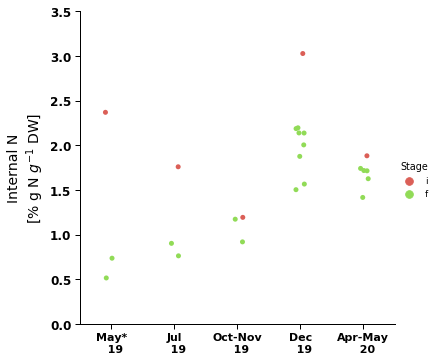

In [50]:
# Internal N at beggining and end of experiments - period 1 (starting with N rich Ulva)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
N1 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')],hue = 'Stage',palette=palette).set(xlabel='', ylabel='Internal N\n[% g N $g^{-1}$ DW]')
N1.set_xticklabels(["May*\n  19", "Jul\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#N1BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 1)],hue = 'Stage',kind = 'box').set(xlabel='', ylabel='Internal N')
#N1BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N1BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

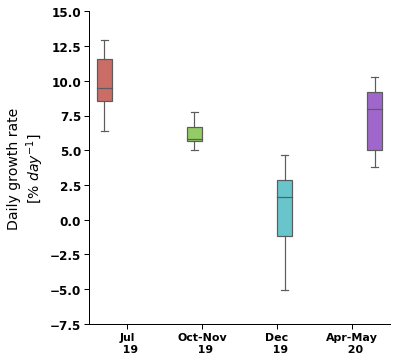

In [105]:
# GR at beggining and end of experiments - period 1 (starting with N rich Ulva)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
N1 = sns.catplot(x = 'Exp', y = 'GR', data = df3[(df3.Exp != 1)&(df3.Depth == 5)&(df3.Period == 'Continuous')],hue = 'Exp',palette=palette,kind='box').set(xlabel='', ylabel='Daily growth rate\n[% $day^{-1}$]')
N1.set_xticklabels(["Jul\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#N1BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 1)],hue = 'Stage',kind = 'box').set(xlabel='', ylabel='Internal N')
#N1BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N1BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

In [51]:
# average DGR and N in 5m depth, continuous fertilizing

DGR_V,N_V = [],[]
for i in [2,3,4,5]:
    Dval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp == i)].DGR
    Nval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp == i)].N
    DGR_V.append(Dval)
    N_V.append(Nval)
    
print(DGR_V)
print(N_V)

[50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
62    0.077470
63    0.177315
64    0.192143
65    0.124470
66    0.129353
67    0.106246
Name: DGR, dtype: float64, 101         NaN
102         NaN
103         NaN
104         NaN
105         NaN
106         NaN
107         NaN
108         NaN
109         NaN
119    0.069286
120    0.082143
121    0.082143
122    0.067143
123    0.069286
124    0.058571
125    0.073571
126    0.060714
127    0.097857
Name: DGR, dtype: float64, 128         NaN
129         NaN
130         NaN
131         NaN
132         NaN
133         NaN
134         NaN
135         NaN
136         NaN
137         NaN
138         NaN
139         NaN
140   -0.022917
141    0.025000
142    0.040417
143    0.008750
144    0.025417
145    0.011250
146    0.053571
147    0.032143
148    0.030714
149   -0.035714
150   -0.043571
151   -0.006429
Name: DGR, dtype: float64, 152         NaN
153         NaN
154         NaN
155         NaN
15

In [52]:
Dval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)&(np.isnan(df3.dN)!= True)].DGR
Nval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)&(np.isnan(df3.dN)!= True)].dN

In [53]:
# Pearson DGR vs N offshore (except exp 5)

from scipy.stats import pearsonr 
   
# Apply the pearsonr() 
corr, _ = pearsonr(Dval, Nval)
print('Pearsons correlation: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 

Pearsons correlation: -0.462


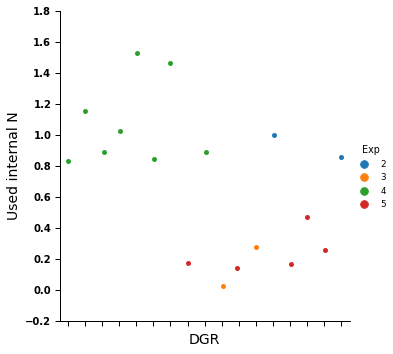

In [54]:
#Offshore results for D = 5, first period, without the preliminary experiment
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2D5 = sns.catplot(x = 'DGR', y = 'dN', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)&(np.isnan(df3.dN)!= True)],hue='Exp').set(xlabel='DGR', ylabel='Used internal N')
#SA2D5 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)],hue='Depth',palette=palette).set(xlabel='', ylabel='Daily growth rate')
SA2D5.set_xticklabels([""],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2D5.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

In [55]:
# Mann-Whitney U Test between beggining and end of cultivation experiments-  N
#print(stats.mannwhitneyu(dN[(dN['Period'] == 'Continuous')&(dN['Stage'] == 'i')]['N'],dN[(dN['Period'] == 'Continuous')&(dN['Stage'] == 'f')])
#print(stats.mannwhitneyu(dN[(dN['Period'] == 'Continuous')]['N'],dN[(dN['Period'] == 'Rapid')]['N']))
      
    
# Mann-Whitney U Test between short and long fertilizing - DGR and N
stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'i')]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'f')]['N'])

MannwhitneyuResult(statistic=225.0, pvalue=1.0706126058755052e-10)

In [56]:
for i in [1,2,3,4,5]:
    a = stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'i')&(df3['Exp'] == i)]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'f')&(df3['Exp'] == i)]['N'])
    print(a)

MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)
MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)
MannwhitneyuResult(statistic=33.0, pvalue=0.2682497346597282)
MannwhitneyuResult(statistic=35.0, pvalue=0.01754455804702393)
MannwhitneyuResult(statistic=18.0, pvalue=0.0010047524278300067)


In [57]:
dN.Stage

15     f
18     f
21     f
36     f
38     f
41     f
56     f
58     f
64     f
67     f
80     f
82     f
88     f
91     f
110    f
112    f
119    f
127    f
140    f
141    f
142    f
143    f
146    f
148    f
150    f
151    f
165    f
167    f
169    f
171    f
174    f
Name: Stage, dtype: object

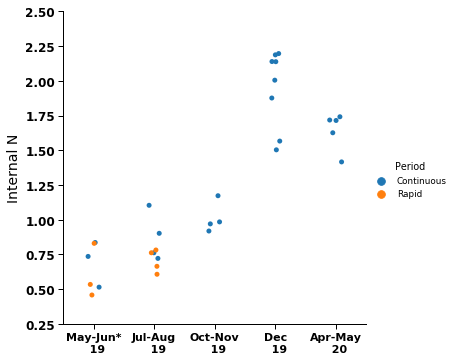

In [58]:
# Internal N at beggining and end of experiments - period 1 (starting with N rich Ulva)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
N1 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Stage == 'f')],hue = 'Period').set(xlabel='', ylabel='Internal N')
N1.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#N1BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 1)],hue = 'Stage',kind = 'box').set(xlabel='', ylabel='Internal N')
#N1BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N1BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

In [59]:
# kruskal test - diffrences between experiments (depth 5m, period 1)

sp.stats.kruskal(d5N[(d5N['Exp'] == 1)]['N'],
                d5N[(d5N['Exp'] == 2)]['N'],
                d5N[(d5N['Exp'] == 3)]['N'],
                d5N[(d5N['Exp'] == 4)]['N'],
                d5N[(d5N['Exp'] == 5)]['N'])

# There is a significant difference between frequencies

KruskalResult(statistic=13.683157894736851, pvalue=0.008378061323177035)

In [60]:
# post - hoc multiple comparisons between frequencies

data = [d5N[(d5N['Exp'] == 1)]['N'],
                d5N[(d5N['Exp'] == 2)]['N'],
                d5N[(d5N['Exp'] == 3)]['N'],
                d5N[(d5N['Exp'] == 4)]['N'],
                d5N[(d5N['Exp'] == 5)]['N']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#No significant difference between any two frequencies

,1,2,3,4,5
1,1.000000,1.000000,1.000000,0.034763,0.532585
2,1.000000,1.000000,1.000000,0.134139,1.000000
3,1.000000,1.000000,1.000000,0.430705,1.000000
4,0.034763,0.134139,0.430705,1.000000,1.000000
5,0.532585,1.000000,1.000000,1.000000,1.000000


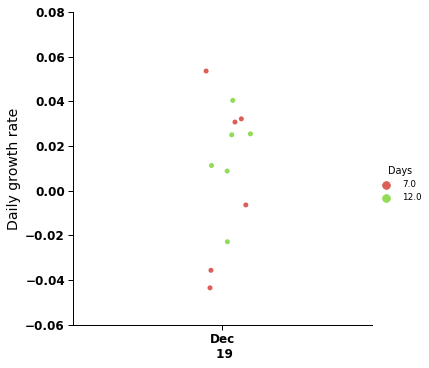

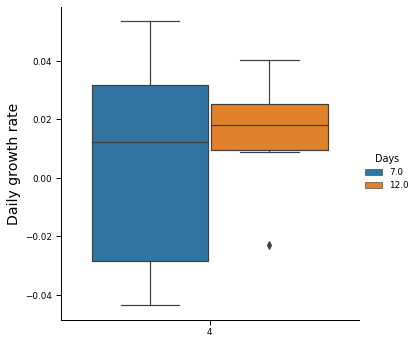

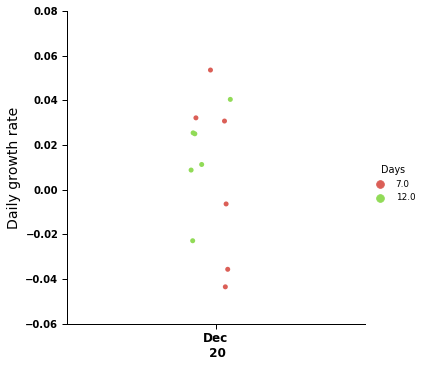

In [61]:
#Offshore results for D = 5, first period - comparison between 2 different cultivation periods

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2Days = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2Days.set_xticklabels(["Dec\n 19"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2Days.set_yticklabels(fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})


#N1.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
SA2DaysBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],hue = 'Days',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
SA2DaysBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2DaysBOX.set_xticklabels(["Dec\n 20"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysBOX.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})


In [62]:
# Mann-Whitney U Test between short and long cultivation duration - DGR and N
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 7)]['DGR'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 12)]['DGR']))
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 7)]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 12)]['N']))

MannwhitneyuResult(statistic=17.0, pvalue=0.4680931467365297)
MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)


In [63]:
# Mann-Whitney U Test between short and long cultivation duration - DGR and N
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 7)]['DGR'],df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 12)]['DGR']))
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 7)]['N'],df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 12)]['N']))

MannwhitneyuResult(statistic=17.0, pvalue=0.4680931467365297)
MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)


In [64]:
t_statN, p_valN = stats.ttest_ind(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 7)]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 12)]['N'], equal_var=False)


C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


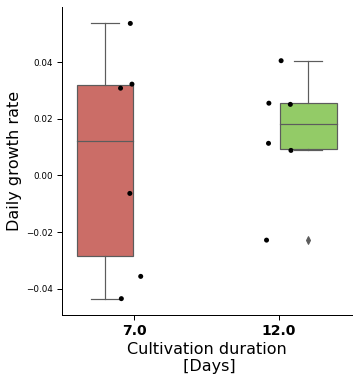

In [65]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Days', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],kind='box',palette=palette,hue='Days')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot(x = 'Days', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],color='k').set(xlabel='Cultivation duration\n [Days]', ylabel='Daily growth rate')

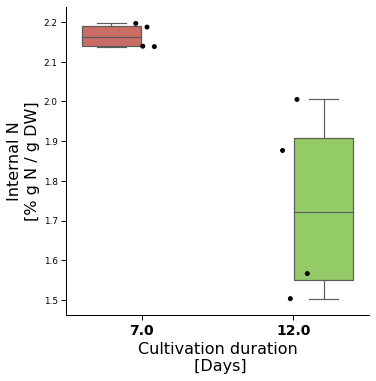

In [66]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Days', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Stage == 'f')],kind='box',palette=palette,hue='Days')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot(x = 'Days', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Stage == 'f')],color='k').set(xlabel='Cultivation duration\n [Days]', ylabel='Internal N\n[% g N / g DW]')

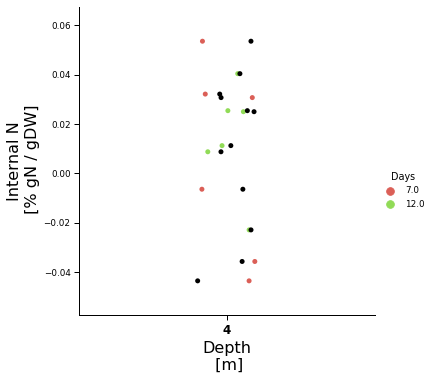

In [94]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
#SA2Days = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels(["Dec\n 19"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})

#SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],color='k').set(xlabel='Depth\n [m]', ylabel='Internal N\n [% gN / gDW]')

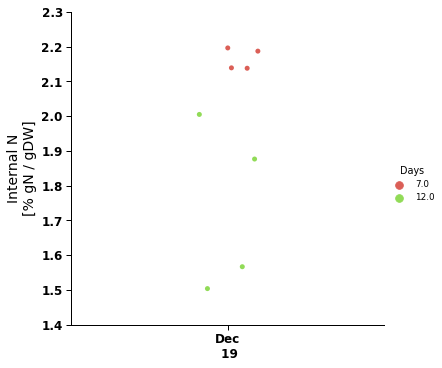

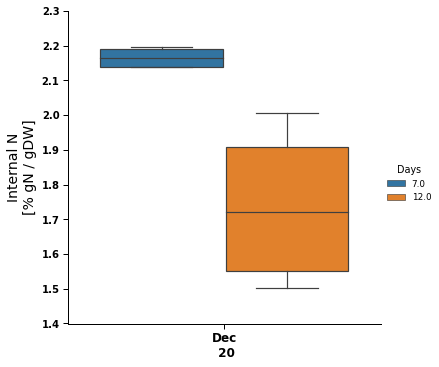

In [68]:
#Offshore results for D = 5, first period - comparison between 2 different cultivation periods

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2Days = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
SA2Days.set_xticklabels(["Dec\n 19"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2Days.set_yticklabels(fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})


# box plot
SA2DaysBOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],hue = 'Days',kind = 'box').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
SA2DaysBOX.set_xticklabels(["Dec\n 20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysBOX.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})


In [69]:
# T-test for N and DGR in different durations of exp 4 (only positive DGR)
dN = df3[(df3.Stage == 'f')&(np.isnan(df3.N)!= True)]
#for i in [7,12]:
t_statDGR, p_valDGR = stats.ttest_ind(d[(d['Exp'] == 4)&(d['Days'] == 7)&(d['DGR'] > 0)]['DGR'],d[(d['Exp'] == 4)&(d['Days'] == 12)&(d['DGR'] > 0)]['DGR'], equal_var=False)
t_statN, p_valN = stats.ttest_ind(dN[(dN['Exp'] == 4)&(dN['Days'] == 7)&(dN['DGR'] > 0)]['N'],dN[(dN['Exp'] == 4)&(dN['Days'] == 12)&(dN['DGR'] > 0)]['N'], equal_var=False)

print(t_statDGR, p_valDGR)
print(t_statN,p_valN)

1.7823544160096276 0.14387542830096334
2.9555517639147086 0.09284904458027214


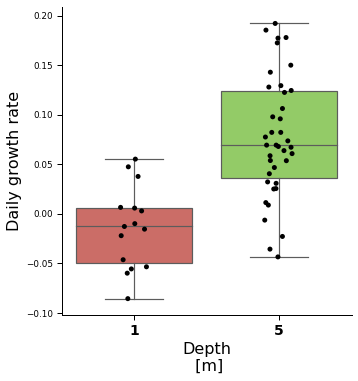

In [70]:
# growth rates in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Depth', y = 'DGR', data = d[(d['Period'] == 'Continuous')],kind='box',palette=palette)#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA1_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Depth', y = 'DGR', data = d[(d['Period'] == 'Continuous')],color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

In [71]:
# T-test for N and DGR in different periods
t_statDGR, p_valDGR = stats.ttest_ind(d[(d['Period'] == 1)]['DGR'],d[(d['Period'] == 2)]['DGR'], equal_var=False)
t_statN, p_valN = stats.ttest_ind(dN[(dN['Period'] == 1)]['N'],dN[(dN['Period'] == 2)]['N'], equal_var=False)

print(t_statDGR, p_valDGR)
print(t_statN,p_valN)

nan nan
nan nan


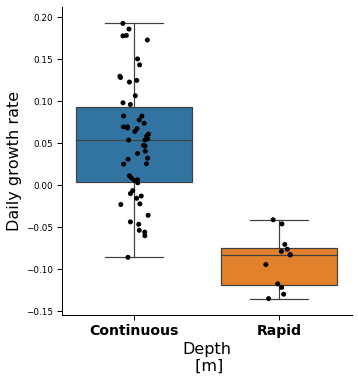

In [72]:
# S.A #2 - growth rates in different periods
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],kind='box')
SA1_DUR_DGR.set_xticklabels([1, 2],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

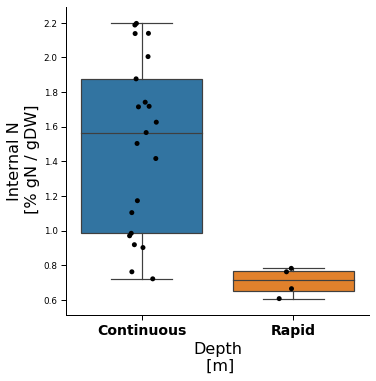

In [73]:
# S.A #2 - growth rates in different periods
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Period', y = 'N', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],kind='box')
SA1_DUR_DGR.set_xticklabels([1, 2],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Period', y = 'N', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],color='k').set(xlabel='Depth\n [m]', ylabel='Internal N\n [% gN / gDW]')

In [74]:
# data summary of depth = 5, period =1, by exp (DGR)
d5 = d[(d['Depth'] == 5)&(d['Period'] == 1)&(d['Exp'] != 1)&(np.isnan(d.N)!= True)]
rp.summary_cont(d5['DGR'].groupby(d5['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,


In [75]:
# data summary of depth = 5, period =1, by exp (N)
d5 = d[(d['Depth'] == 5)&(d['Period'] == 1)&(d['Exp'] != 1)]
rp.summary_cont(d5['DGR'].groupby(d5['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,


In [76]:
dN = df3[(df3.Stage == 'f')&(np.isnan(df3.N)!= True)]
rp.summary_cont(dN['N'].groupby(dN['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
1,6,0.6515,0.1691,0.0690,0.4741,0.8290
2,8,0.7884,0.1542,0.0545,0.6594,0.9173
3,4,1.0116,0.1112,0.0556,0.8347,1.1886
4,8,1.9516,0.2786,0.0985,1.7187,2.1845
5,5,1.6435,0.1342,0.0600,1.4768,1.8101


In [77]:
df3.head()

,Sample,Exp,Period,Cage,Depth,Stage,Days,Timei,Timeh,Timem,...,NO3,dN,TN,DGR,RGR,GR,Treatment,Comment,Comment 2,N_Saturation
0,1.0,1,Continuous,1,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
1,2.0,1,Continuous,2,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
2,3.0,1,Continuous,3,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
3,4.0,1,Continuous,4,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no
4,5.0,1,Continuous,5,1,i,NaN,"2019,5,20,09,0","2019,5,20,09,0","2019,5,20,09,0",...,NaN,NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,no


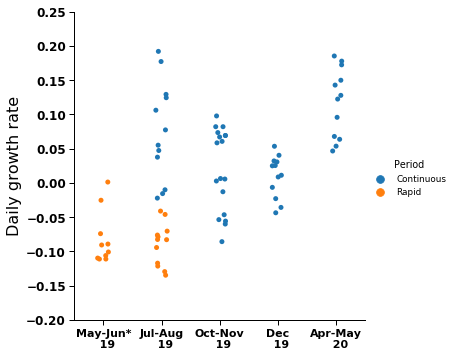

In [78]:
#Offshore results by period (all results)

# strip plot - all data
SA2Per = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Comment != 'Losses')],hue = 'Period').set(xlabel='', ylabel='Daily growth rate')
SA2Per.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
SA2Per.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#SA2PerBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Comment != 'Losses')],hue = 'Period',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
#SA2PerBOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#SA2PerBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

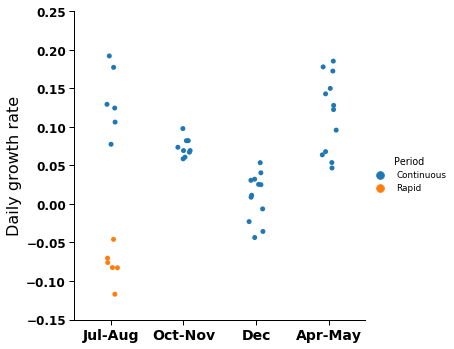

In [85]:
#Offshore results by period (all results)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

SA2Per = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp != 1)],hue = 'Period').set(xlabel='', ylabel='Daily growth rate')#,kind="box")
SA2Per.set_xticklabels(["Jul-Aug", "Oct-Nov","Dec","Apr-May"],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#SA2D5 = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Period == 1)&(df3.Exp != 1)],hue='Depth').set(xlabel='', ylabel='Daily growth rate')#,hue = 'Depth')#,kind="box")
#SA2D5.set_xticklabels(["Jul-Aug", "Oct-Nov","Dec","Apr-May"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

#N1.set_xticklabels(["May-Jun", "Jul-Aug", "Oct-Nov","3\nDec","4\nApr-May"],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'darkred'})#,fontsize = 12, fontweight = bold)
SA2Per.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)
#N1.set_ylabel('lololo')

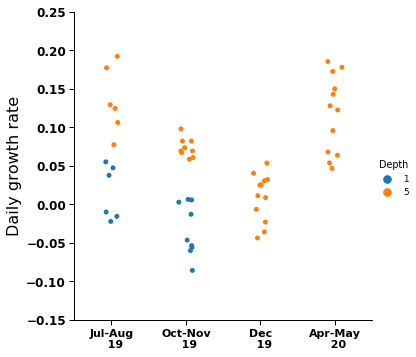

In [86]:
#Offshore growth rates by Depth (all results)

# strip plot - all data
SA2D = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Period == 'Continuous')],hue = 'Depth').set(xlabel='', ylabel='Daily growth rate')
SA2D.set_xticklabels(["Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
SA2D.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#SA2DBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Period == 1)],hue = 'Depth',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
#SA2DBOX.set_xticklabels(["Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#SA2DBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

#SA2D.set_xticklabels(["Pre\nMay-Jun", "1\nJul-Aug", "2\nOct-Nov","3\nDec","4\nApr-May"])


# strip plot - all data
#SA2Per = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Comment != 'Losses')],hue = 'Period').set(xlabel='', ylabel='Daily growth rate')
#SA2Per.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#SA2Per.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})


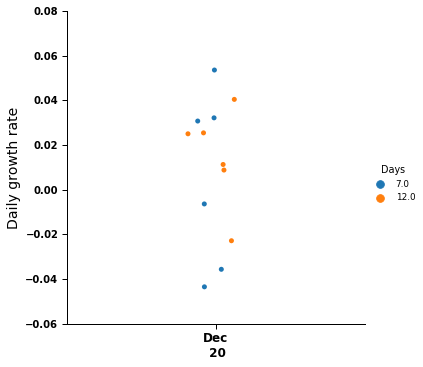

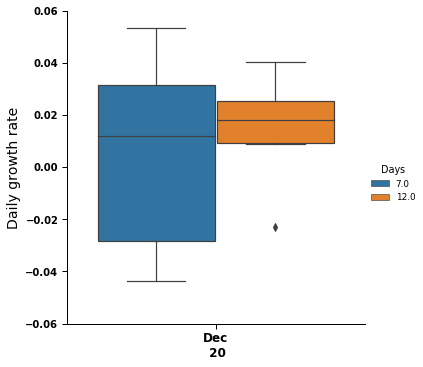

In [87]:
#Offshore results for D = 5, first period - comparison between 2 different cultivation periods (cages with losses are ommited)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
SA2DaysL = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Comment != 'Losses')],hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2DaysL.set_xticklabels(["Dec\n 20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysL.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

# box plot
SA2DaysLBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Comment != 'Losses')],hue = 'Days',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
SA2DaysLBOX.set_xticklabels(["Dec\n 20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysLBOX.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

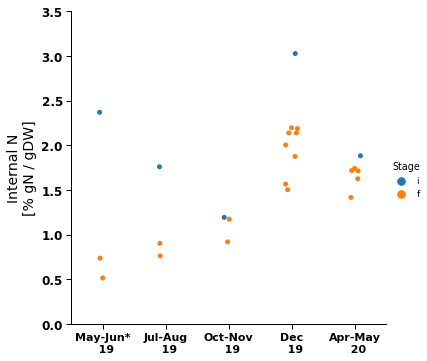

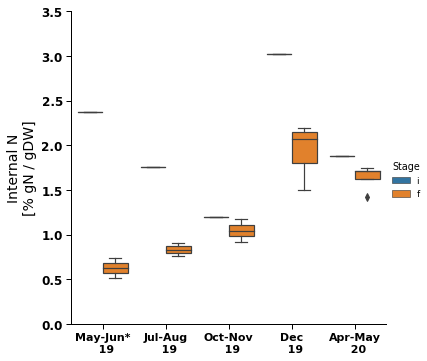

In [93]:
# Internal N at beggining and end of experiments - period 1 (starting with N rich Ulva)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
N1 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 'Continuous')&(df3.Depth == 5)],hue = 'Stage').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
N1.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
N1BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period =='Continuous')&(df3.Depth == 5)],hue = 'Stage',kind = 'box').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
N1BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

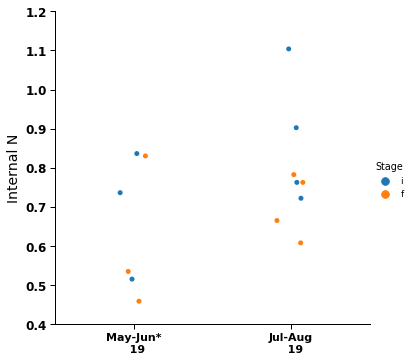

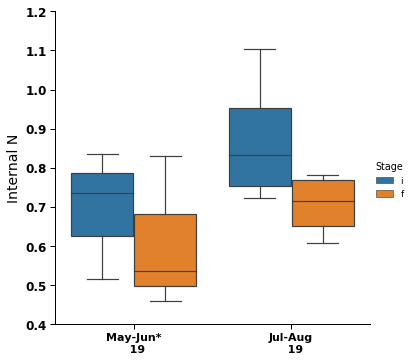

In [92]:
# Internal N at beggining and end of experiments - period 2 (using Ulva that was cultivated offshore and fertilized onshore for ~20 hours)

# strip plot
N2 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 'Rapid')],hue = 'Stage').set(xlabel='', ylabel='Internal N')
N2.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N2.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
N2BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 'Rapid')],hue = 'Stage',kind='box').set(xlabel='', ylabel='Internal N')
N2BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N2BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})


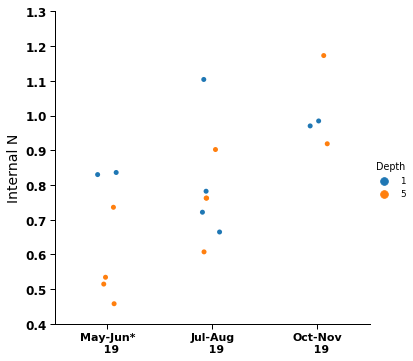

In [83]:
# Internal N at beggining and end of experiments - period 2 (using Ulva that was cultivated offshore and fertilized onshore for ~20 hours)

# strip plot
N2 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Stage == 'f')&(df3.Exp != 4)&(df3.Exp != 5)],hue = 'Depth').set(xlabel='', ylabel='Internal N')
N2.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N2.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#N2BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Stage == 'f')&(df3.Exp != 4)&(df3.Exp != 5)],hue = 'Depth',kind='box').set(xlabel='', ylabel='Internal N')
#N2BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N2BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})


In [91]:
# Pearson onshore fertilizing

from scipy.stats import pearsonr 
   
list1a = [310,442,246] 
list1b = [301,350,346]

list13a = [382,216,240]
list13b = [292,351,228]

# Apply the pearsonr() 
corr, _ = pearsonr(list1a, list1b) 
print('\nPearsons correlation for no-shade bottles, 1000/1/168: %.3f' % corr) 
# Mann-Whitney U Test
print(stats.mannwhitneyu(list1a,list1b))
      
corr, _ = pearsonr(list13a, list13b) 
print('\nPearsons correlation for exp 2, 1000/1/168: %.3f' % corr) 
print(stats.mannwhitneyu(list13a,list13b))


Pearsons correlation for no-shade bottles, 1000/1/168: 0.268
MannwhitneyuResult(statistic=4.0, pvalue=0.5)

Pearsons correlation for exp 2, 1000/1/168: -0.110
MannwhitneyuResult(statistic=4.0, pvalue=0.5)
